# 선형회귀 분석

In [23]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline  

In [24]:
# 단순선형회귀 모델 만들기

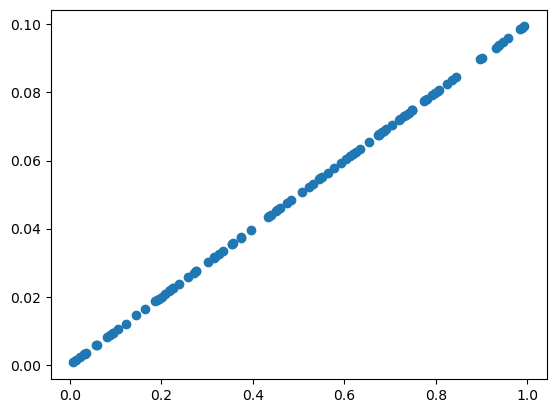

In [25]:
# 0~1 사이의 랜덤한 숫자 100개 생성 (독립변수)
x = np.random.rand(100)         
y =0.2 * x * 0.5 #ax+5

plt.scatter(x,y)

In [26]:
# 실제값과 예측값을 시각적으로 비교하기 위한 함수 정의
def plt_prediction(pred,y):
    plt.figure(figsize=(8,6))
    plt.scatter(x,y,color='blue', label='Actual')

In [27]:
# 실제값과 예측값을 시각적으로 비교하기 위한 함수 정의
def plt_prediction(pred, y):
    plt.figure(figsize=(8,6))
# 산점도로 데이터 시각화
    plt.scatter(x, y, color='blue', label='Actual')
    plt.scatter(x, pred, color='orange', label='Prediction')
    plt.legend()
    plt.show()

In [28]:
# 경사하강법 y=wx+b, w결정
# 가중치 w를 -1과 1 사이의 랜덤값으로 초기화
w = np.random.uniform(-1,1)
# 절편 b를 -1과 1 사이의 랜덤값으로 초기화
b = np.random.uniform(-1,1)
# 학습률 설정 (값이 클수록 변화량이 큼)
learning_rate = 0.5 #임의 값


Epoch 0, W: -0.5207, Error:0.1705


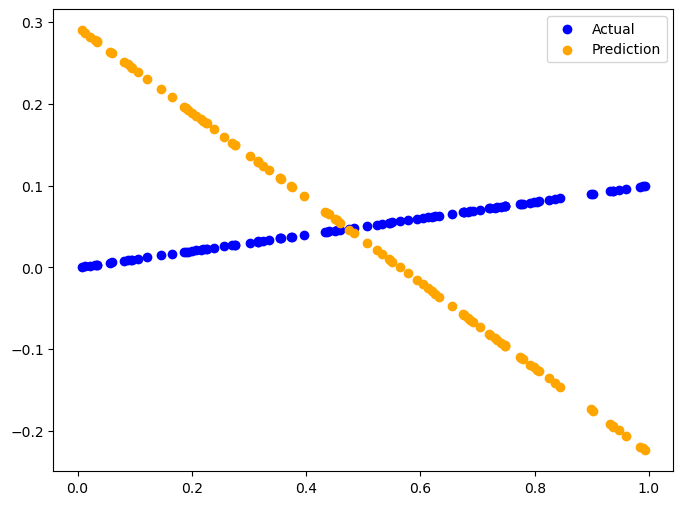

Epoch 10, W: -0.3382, Error:0.1125


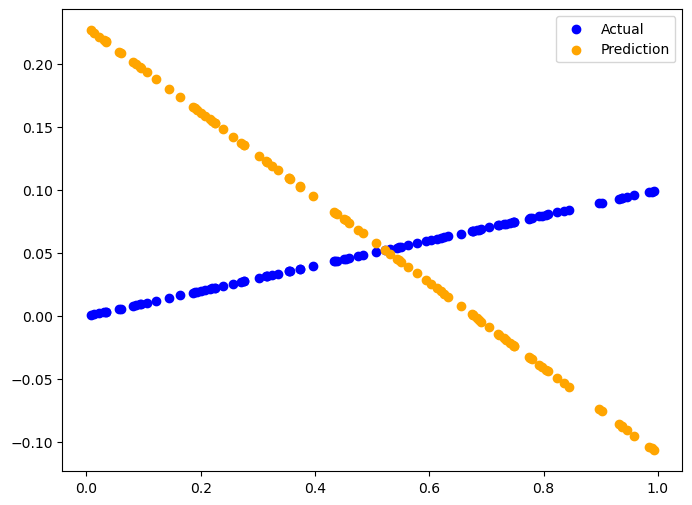

Epoch 20, W: -0.2159, Error:0.0811


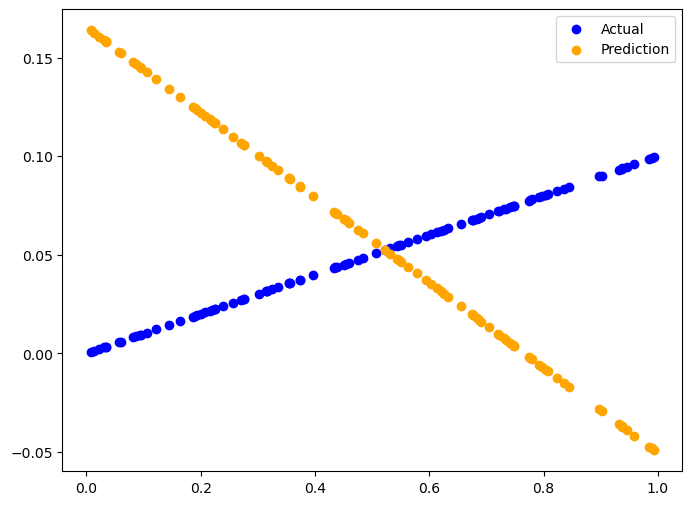

Epoch 30, W: -0.1277, Error:0.0585


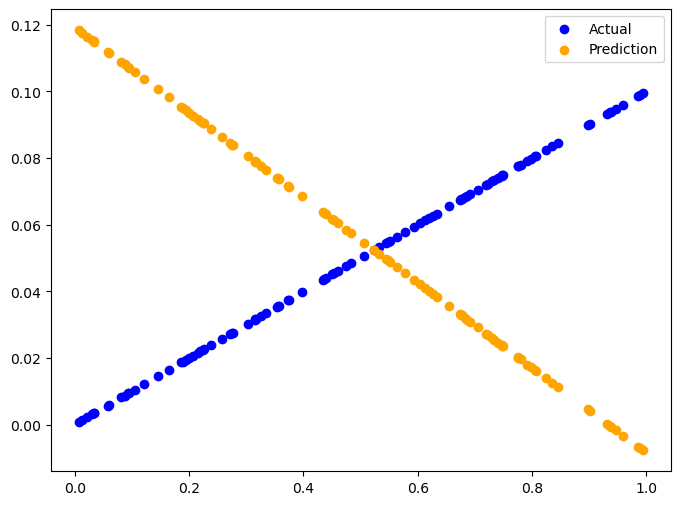

Epoch 40, W: -0.0642, Error:0.0421


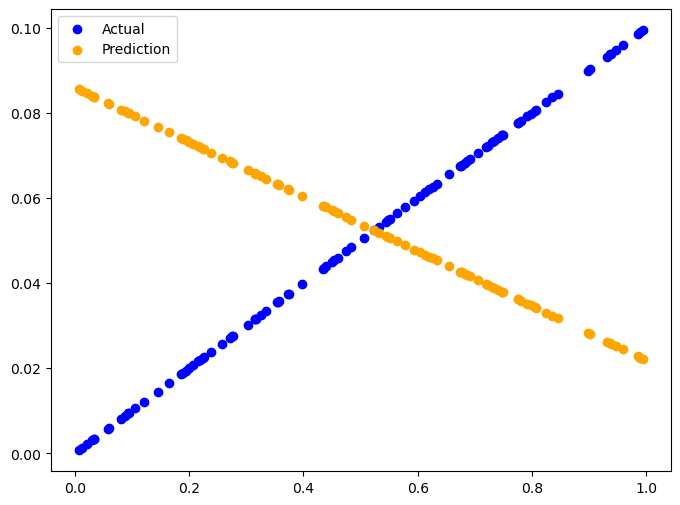

Epoch 50, W: -0.0184, Error:0.0304


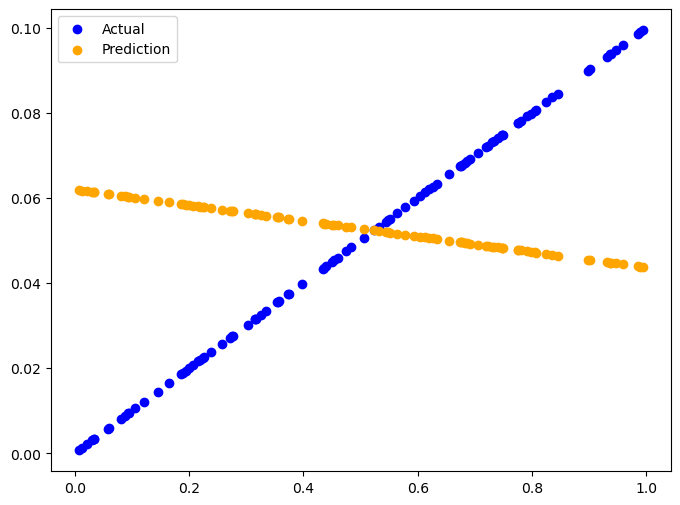

Epoch 60, W: 0.0147, Error:0.0219


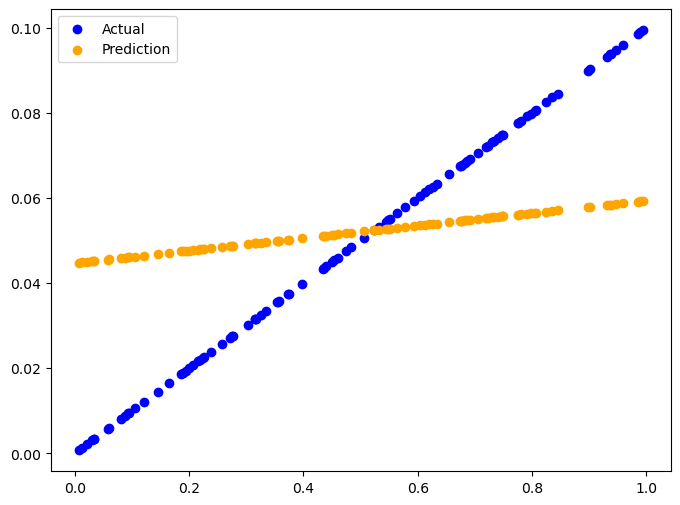

Epoch 70, W: 0.0385, Error:0.0158


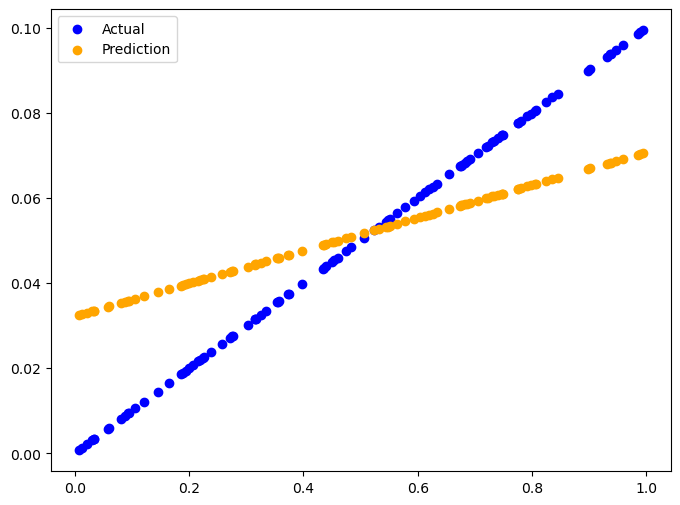

Epoch 80, W: 0.0557, Error:0.0114


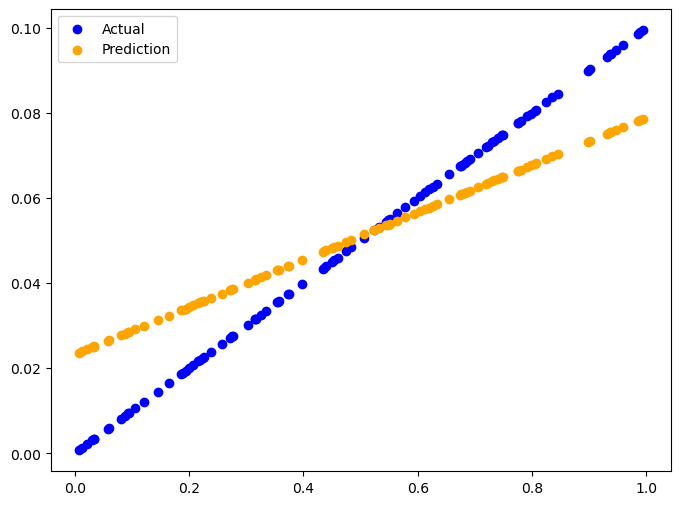

Epoch 90, W: 0.0680, Error:0.0082


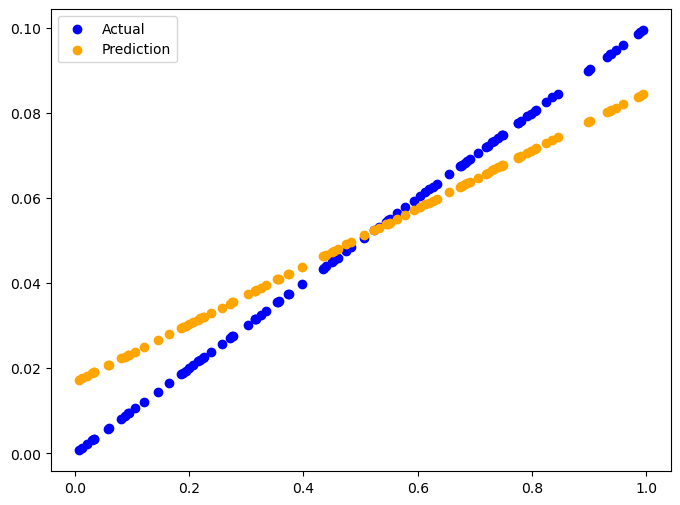

In [29]:
# 경사하강법을 통해 100번 반복 학습
for epoch in range(100):
# 현재 w, b를 이용해 예측값 계산
    y_pred = w*x + b
# 평균 오차 계산 (예측값과 실제값 차이)
    error = np.abs(y_pred - y).mean()
    
    if error < 0.001 : 
        break
# w에 대한 경사도 계산
    w_descent = learning_rate * ((y_pred - y)*x).mean()
# b에 대한 경사도 계산
    b_descent = learning_rate * ((y_pred - y).mean())
    
# w 값을 경사 방향으로 업데이트
    w = w - w_descent
# b 값을 경사 방향으로 업데이트
    b = b - b_descent
    
    if epoch%10 == 0 :
# 10 에폭마다 현재 w, 오차 출력 및 예측 결과 시각화
        print(f'Epoch {epoch}, W: {w:.4f}, Error:{error:.4f}')
        y_pred = w * x + b 
        plt_prediction(y_pred, y)

In [30]:
# 데이터를 학습용과 테스트용으로 분리
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# 평균 제곱 오차 계산
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib


Using matplotlib backend: inline


In [31]:
# 보스턴 주택 가격 데이터 CSV 파일 불러오기
bostonDF = pd.read_csv('data/boston.csv')
bostonDF.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [32]:
# 독립변수(X)와 종속변수(y) 분리
X = bostonDF.drop('target', axis=1).values
y = bostonDF['target'].values
bostonDF.shape

(506, 14)

bostonDF.head()

<details>
<summary> 컬럼 설명</summary>

| 컬럼명         | 설명                                                       |
| ----------- | -------------------------------------------------------- |
| **CRIM**    | 자치시(per capita)당 범죄율                                     |
| **ZN**      | 25,000 평방피트를 초과하는 주거용 토지 비율(%)                           |
| **INDUS**   | 비소매 상업지역 면적 비율                                           |
| **CHAS**    | 찰스강(Charles River) 인접 여부 (1: 인접, 0: 비인접)                 |
| **NOX**     | 일산화질소 농도 (parts per 10 million)                          |
| **RM**      | 주택 1가구당 평균 방 수                                           |
| **AGE**     | 1940년 이전에 건축된 주택 비율                                      |
| **DIS**     | 5개 보스턴 고용센터까지의 거리 가중치 합 (접근성)                            |
| **RAD**     | 방사형 도로 접근성 지수                                            |
| **TAX**     | 10,000달러당 재산세율                                           |
| **PTRATIO** | 학생/교사 비율                                                 |
| **B**       | 흑인 인구 비율을 기반으로 만든 지표 (공식: 1000(Bk - 0.63)^2, Bk는 흑인의 비율) |
| **LSTAT**   | 저소득층 비율 (%)                                              |
| **target**  | 주택 가격 (1,000달러 단위)   
                                    |
</details>


In [33]:
# 데이터를 학습용과 테스트용으로 분리
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3, random_state=156)
# 선형 회귀 모델 생성
lr = LinearRegression()
# 모델을 학습 데이터에 적합시킴
lr.fit(xtrain, ytrain)
# 테스트 데이터로 예측 수행
y_pred = lr.predict(xtest)
y_pred[:3]

array([23.15424087, 19.65590246, 36.42005168])

In [34]:
# 평가
# 평균 제곱 오차 계산
mse = mean_squared_error(ytest, y_pred)
# RMSE 계산
rmse = np.sqrt(mse)
rmse, mse

(np.float64(4.158956107955705), np.float64(17.296915907902065))

In [35]:
# 결정계수 
# 결정계수(R2) 계산
r2_score(ytest, y_pred)

np.float64(0.7572263323138934)

In [36]:
#회귀식
# w1, w0(편향)

# 절편과 회귀 계수 확인
lr.intercept_, lr.coef_ # intercept = w1, coef = w0

(np.float64(40.99559517216439),
 array([-1.12979614e-01,  6.55124002e-02,  3.44366694e-02,  3.04589777e+00,
        -1.97958320e+01,  3.35496880e+00,  5.93713290e-03, -1.74185354e+00,
         3.55884364e-01, -1.42954516e-02, -9.20180066e-01,  1.03966156e-02,
        -5.66182106e-01]))

y = w0 + w1*x1 + w2*x2 + .... w13*x13

In [37]:
# 절편과 회귀 계수 확인
np.round(lr.intercept_, 1), np.round(lr.coef_,1)

(np.float64(41.0),
 array([ -0.1,   0.1,   0. ,   3. , -19.8,   3.4,   0. ,  -1.7,   0.4,
         -0. ,  -0.9,   0. ,  -0.6]))

In [38]:
# 절편과 회귀 계수 확인
pd.Series(data= np.round(lr.coef_,1), index=bostonDF.drop('target', axis=1).columns).sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
B           0.0
TAX        -0.0
AGE         0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [39]:
# 교차 검증
from sklearn.model_selection import cross_val_score
# 평균 제곱 오차 계산
neg_mse_scores = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5) # neg는 거꾸로
neg_mse_scores

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [40]:
# mse, rmse, R2(얘는 따로 계산해야 한다고 함)

RMSE = np.sqrt(neg_mse_scores*-1)
np.mean(RMSE), RMSE

(np.float64(5.828658946215813),
 array([3.52991509, 5.10378498, 5.75101191, 8.9867887 , 5.77179405]))

In [41]:
# R2
# 결정계수(R2) 계산
r2_score_scores = cross_val_score(lr, X, y, scoring='r2', cv=5)
# 결정계수(R2) 계산
r2_score_scores, np.mean(r2_score_scores)

(array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154]),
 np.float64(0.3532759243958839))

오차는 작고(4.15 > 5.82), 결정계수는 작아진 결과 

<details>
<summary> 컬럼 설명</summary>

| 컬럼명         | 설명                                                       |
| ----------- | -------------------------------------------------------- |
| **CRIM**    | 자치시(per capita)당 범죄율                                     |
| **ZN**      | 25,000 평방피트를 초과하는 주거용 토지 비율(%)                           |
| **INDUS**   | 비소매 상업지역 면적 비율                                           |
| **CHAS**    | 찰스강(Charles River) 인접 여부 (1: 인접, 0: 비인접)                 |
| **NOX**     | 일산화질소 농도 (parts per 10 million)                          |
| **RM**      | 주택 1가구당 평균 방 수                                           |
| **AGE**     | 1940년 이전에 건축된 주택 비율                                      |
| **DIS**     | 5개 보스턴 고용센터까지의 거리 가중치 합 (접근성)                            |
| **RAD**     | 방사형 도로 접근성 지수                                            |
| **TAX**     | 10,000달러당 재산세율                                           |
| **PTRATIO** | 학생/교사 비율                                                 |
| **B**       | 흑인 인구 비율을 기반으로 만든 지표 (공식: 1000(Bk - 0.63)^2, Bk는 흑인의 비율) |
| **LSTAT**   | 저소득층 비율 (%)                                              |
| **target**  | 주택 가격 (1,000달러 단위)   
                                    |
</details>


# 다항회귀

y = w0 + w1*x1 + w2*x2 + w3*x3^3

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [43]:

xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3,random_state=156)
model_poly = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('Linear',LinearRegression())]
)
model_poly.fit(xtrain, ytrain)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('Linear', LinearRegression())])

In [44]:
pred_poly = model_poly.predict(xtest)
mean_squared_error(ytest,pred_poly)

np.float64(15.555752307472005)

``` from sklearn.metrics import accuracy_score
acc = accuracy_score(ytest, pred_poly) ```

위와 같은 식은 회귀함수가 들어갔기 때문에 오류가 나옴

In [45]:
r2_score(ytest, pred_poly)

np.float64(0.7816647163338353)

2차~ 5차

In [67]:
results = []

for degrees in range(1,3):
    model_poly = Pipeline([
    ('poly', PolynomialFeatures(degree=degrees, include_bias=False)),
    ('Linear',LinearRegression())]
)
    model_poly.fit(xtrain, ytrain)
    pred_poly = model_poly.predict(xtest)
    mse = mean_squared_error(ytest,pred_poly)
    rmse = np.sqrt(mse)
    r2 = r2_score(ytest, pred_poly)

    results.append({ 'degree': degrees,
                'mse' : mse, 
                'RMSE' : rmse,
                'R2' : r2})

In [68]:
pd.DataFrame(results)

,degree,mse,RMSE,R2
0,1,17.296916,4.158956,0.757226
1,2,15.555752,3.944078,0.781665


분류문제 = 범주가 정해져 있으면 분류모델 (아이폰/갤럭시)   
회귀문제 = 연속적인 숫자를 예측하면 회귀문제 ( 아이폰 가격 예측 )

# 규제 회귀 모델 

<details>
<summary> "규제 회귀 모델이란?" </summary>

✅ 먼저, 왜 규제가 필요한가? (필요성부터)   
머신러닝 모델이 너무 정밀하게 학습하면 생기는 대표적인 문제:

과적합(Overfitting)   
→ 학습 데이터는 완벽하게 맞추지만, 새로운 데이터에선 성능이 떨어짐

이건 모델이 너무 복잡해서 잡음(noise)까지 외워버린 상태야.   
그래서 모델을 더 단순하게 만들어야 해 → 이걸 규제(regularization) 라고 해.

✅ 규제 회귀모델이란?   
모델의 복잡도(데이터를 얼마나 복잡하고 정밀하게 설명하려드는가?)를 줄이기 위해, 비용함수(손실함수)에 규제 항을 추가한 회귀      모델이야.  

즉, 단순히 오차만 줄이는 게 아니라   
“계수 값이 너무 커지지 않게 벌점(penalty)”을 주는 회귀 모델이라고 보면 돼.

</details>

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [52]:
ridge = Ridge(alpha=1.0)
ridge.fit(xtrain, ytrain)
pred_rigde = ridge.predict(xtest)

ridge_mse = mean_squared_error(ytest, pred_rigde)
ridge_r2 = r2_score(ytest, pred_rigde)

ridge_mse,ridge_r2


(np.float64(17.206833316177068), np.float64(0.7584907011357223))

In [ ]:
# 릿지 교차검증 

from sklearn.linear_model import RidgeCV, LassoCV

alphas = [0.001, 0.01, 0.1, 1, 10, 100]
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(xtrain,ytrain)
ridge_preds = ridge_cv.predict(xtest)
ridge_mse = mean_squared_error(ytest, ridge_preds)
ridge_r2 = r2_score(ytest, ridge_preds)
print(f'ridge CV mse : {ridge_mse: 4f}, r2 : {ridge_r2:4f}')
 

ridge CV mse :  17.296260, r2 : 0.757236


In [73]:
# 라쏘 모델 

lasso = Lasso(alpha=1.0)
lasso.fit(xtrain, ytrain)
pred_lasso = lasso.predict(xtest)

lasso_mse = mean_squared_error(ytest, pred_lasso)
lasso_r2 = r2_score(ytest, pred_lasso)

lasso_mse,lasso_r2

(np.float64(22.137098759778443), np.float64(0.6892911611262599))

In [74]:
# 라쏘 교차검증 

from sklearn.linear_model import LassoCV, LassoCV

alphas = [0.001, 0.01, 0.1, 1, 10, 100]
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(xtrain, ytrain)
lasso_pred = lasso_cv.predict(xtest)
lasso_mse = mean_squared_error(ytest, lasso_pred)
lasso_r2 = r2_score(ytest, lasso_pred)
print(f'lasso CV mse : {lasso_mse: 4f}, r2 : {lasso_r2:4f}')
 

lasso CV mse :  17.283109, r2 : 0.757420


# 엘라스틱넷

In [65]:
enet = ElasticNet(alpha=0.1, l1_ratio=0.5)
enet.fit(xtrain, ytrain)
pred_enet = enet.predict(xtest)
print("\n[엘라스틱회귀]")
print(f'"mse," {mean_squared_error(ytest, pred_enet)}')
print('R2:', r2_score(ytest, pred_enet))


[엘라스틱회귀]
"mse," 18.11673827943616
R2: 0.7457195824951279


In [ ]:
모델성능 비교

In [78]:
results  = pd.DataFrame({
    '모델' : ['다항회귀', '릿지회귀', '라쏘회귀', '엘라스팃넷회귀'],
    'MSE' : [ mean_squared_error(ytest, pred_poly),
             mean_squared_error(ytest, pred_rigde),
             mean_squared_error(ytest, lasso_pred),
             mean_squared_error(ytest, pred_enet)],
    'R2' : [r2_score(ytest,pred_poly),
            r2_score(ytest,pred_rigde),
            r2_score(ytest,lasso_pred),
            r2_score(ytest,pred_enet)]
    })

results

,모델,MSE,R2
0,다항회귀,15.555752,0.781665
1,릿지회귀,17.206833,0.758491
2,라쏘회귀,17.283109,0.757420
3,엘라스팃넷회귀,18.116738,0.745720
